In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline
# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension ("coastline approximation" - 1)

Using the same breast cancer dataset we looked at in class, try different k's (2,3,4 and 5). Which has the best silhouette score? What does that indicate?


For the best cluster, use ggplot to make a graph for each cluster that shows the proportion/number of Malignant (diagnosis = M) tumors in each cluster. What does this tell you about the clusters?

In [6]:
bc = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/BreastCancer.csv")
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


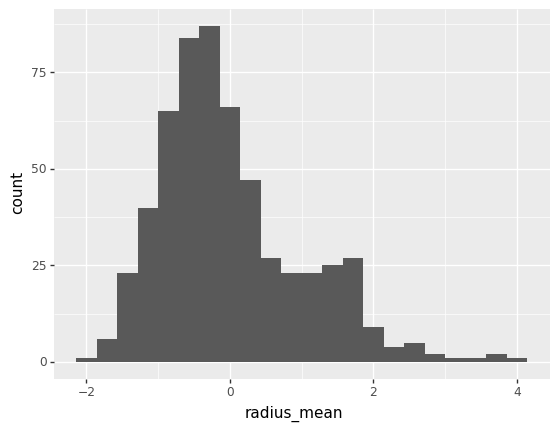

<ggplot: (301113749)>

In [7]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]

X = bc[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

(ggplot(X, aes("radius_mean")) + geom_histogram())

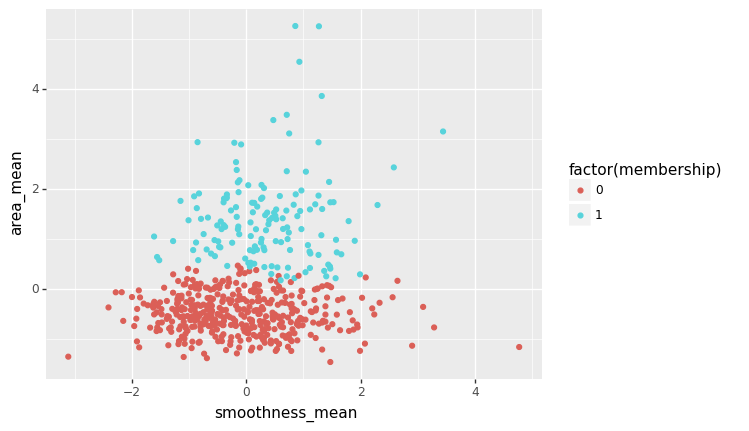

<ggplot: (271809585)>

In [20]:
KM = KMeans(n_clusters = 2)

KM.fit(X)

membership = KM.predict(X)

XALL = X
XALL["clust"] = membership

(ggplot(XALL, aes(x = "smoothness_mean", y = "area_mean", color = "factor(membership)")) + geom_point())

In [21]:
silhouette_score(X, membership)

0.46000171445817467

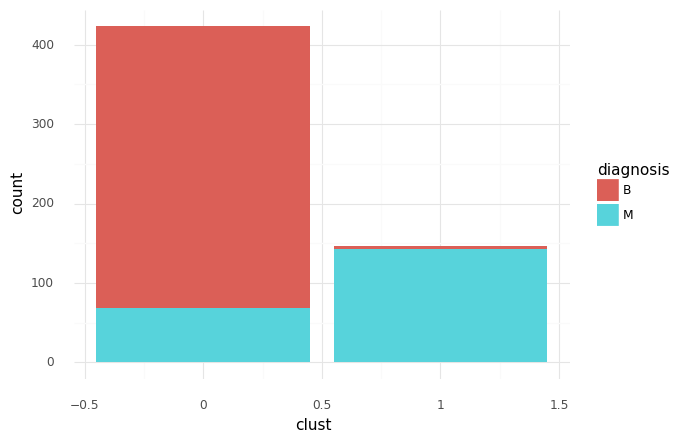

<ggplot: (271800377)>

In [28]:
newdf = XALL
newdf["diagnosis"] = bc["diagnosis"]
(ggplot(newdf, aes(x="clust", fill = "diagnosis")) + 
 geom_bar() + 
theme_minimal())